# Projet Machine Learning - Groupe 1

Promotion 58 - 4GMM, Année universitaire 2023-2024 

Julia Manon (A), Piot Damien (B), Dumas Thomas (B), Ben Abdallah Selim (A)


Les données sont issues du site du concours KAGGLE; il s’agit du jeu de données " Global Data on Sustainable Energy" (2000-2020) disponible ici: https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy.

Le jeu de données comprend 3649 observations et 21 variables, qui représentent diverses caractéristiques liées à la consommation énergétique et à la géographie de 176 pays du monde au cours des années 2000 à 2020.

L’objectif est de prédire la variable Value-co2-emissions à partir des autres variables. Attention : Le jeu de données comporte beaucoup de valeurs manquantes, une étude exploratoire préalable est plus que jamais nécessaire pour se familiariser avec les données et les préparer à la phase de modélisation.

Pour ce faire, nous allons commencer par prendre en main les données et réaliser une analyse exploiratoire de celles-ci. Plus précisément, nous prendrons nos données en mains, nous réaliserons des analyses unidimensionnelles et multidimensionnelles, une étude des corrélation et une ACP. Puis, dans une seconde partie, nous ...

# Prise en main des données et analyse exploratoire

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_40812\845136906.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Prise en main du jeu de données

### Ouverture du jeu de données

In [3]:
# Lecture des données
pd.set_option('display.max_columns', None) # Affichage de toutes les colonnes du dataframe
path=""
data=pd.read_csv(path+"global-data-on-sustainable-energy .csv",sep=",")

# Vérification du contenu
data.head()


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


Interprétation : 

Les noms des colonnes sont assez compliqués, ils sont longs et contiennent ds espaces. Nous allons les renommer par la suite pour simplifier le code et les appels aux colonnes. De plus, en observant un apperçu de notre dataframe, nous constatons que certaines données sont manquantes. Cela est visible par les valeurs marquées comme NaN. Pour palier à ça, nous pouvons réaliser 2 traitements possibles : supprimer les données manquantes ou les estimer. Nous traiterons ces deux possibilités ultérieurement.

Nous commençons par renommer nos colonnes pour simplifier notre dataframe.

In [4]:
# Nous allons renommer les colonnes pour simplifier notre dataframe
# mon_dataframe.rename(columns={'ancien nom': 'nouveau nom'})

data.rename(columns={'Access to electricity (% of population)' : 'Elec_access'}, inplace=True)
data.rename(columns={'Access to clean fuels for cooking' : 'Clean_access'}, inplace=True)
data.rename(columns={'Renewable-electricity-generating-capacity-per-capita' : 'Renewable_per_capita'}, inplace=True)
data.rename(columns={'Financial flows to developing countries (US $)' : 'Financial_flows'}, inplace=True)
data.rename(columns={'Renewable energy share in the total final energy consumption (%)' : 'Renewable_share'}, inplace=True)
data.rename(columns={'Electricity from fossil fuels (TWh)' : 'Fossil_elec'}, inplace=True)
data.rename(columns={'Electricity from nuclear (TWh)' : 'Nuclear_elec'}, inplace=True)
data.rename(columns={'Electricity from renewables (TWh)' : 'Renewable_elec'}, inplace=True)
data.rename(columns={'Low-carbon electricity (% electricity)' : 'Low_carb_elec'}, inplace=True)
data.rename(columns={'Primary energy consumption per capita (kWh/person)' : 'Energy_per_capita'}, inplace=True)
data.rename(columns={'Energy intensity level of primary energy (MJ/$2017 PPP GDP)' : 'PEnergy_intensity'}, inplace=True)
data.rename(columns={'Value_co2_emissions_kt_by_country' : 'CO2'}, inplace=True)
data.rename(columns={'Renewables (% equivalent primary energy)' : 'Renewables'}, inplace=True)
data.rename(columns={'gdp_growth' : 'Growth'}, inplace=True)
data.rename(columns={'gdp_per_capita' : 'GDP_per_capita'}, inplace=True)
data.rename(columns={data.columns[-4] : 'Density'}, inplace=True)
data.rename(columns={'Land Area(Km2)' : 'Area'}, inplace=True)

data.head()

,Entity,Year,Elec_access,Clean_access,Renewable_per_capita,Financial_flows,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,Low_carb_elec,Energy_per_capita,PEnergy_intensity,CO2,Renewables,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


Interprétation : 

Nous affichons notre dataframe comme dans la cellule de code précédente. Nous constatons que les noms des colonnes sont plus simples, comme attendu.

### Etude et modification du type des colonnes

Nous allons maintenant étudier la nature des variables et leur encodage. L'idée est d'avoir un apperçu sur les variables qualitatives et celles quantitatives. 

In [5]:
# Etude des types des colonnes
data.dtypes

Entity                   object
Year                      int64
Elec_access             float64
Clean_access            float64
Renewable_per_capita    float64
Financial_flows         float64
Renewable_share         float64
Fossil_elec             float64
Nuclear_elec            float64
Renewable_elec          float64
Low_carb_elec           float64
Energy_per_capita       float64
PEnergy_intensity       float64
CO2                     float64
Renewables              float64
Growth                  float64
GDP_per_capita          float64
Density                  object
Area                    float64
Latitude                float64
Longitude               float64
dtype: object

Nous allons convertir la variable 'Year' en variable qualitative. En effet, nous souhaitons que les années de nos données soient assimilées à des modalités ou catégories. C'est pour cela que la nature qualitative est à privilégier. De plus, on observe que la densité est présentée comme une variable qualitative alors que les données de cette colonne sont numériques et expriment une quantité. Nous allons modifier la nature de la variable 'Density' pour la convertir en variable quantitative. 

In [6]:
# Transformation de la colonne 'Year' en variable qualitative  
data['Year'] = data['Year'].astype('category')
data['Entity'] = data['Entity'].astype('category')

# Traitement de la colonne 'Density'
data['Density'] = data['Density'].str.replace(',','.')
data['Density'] = data['Density'].astype(float)

# Affichage du type des variables après traitement
data.dtypes

Entity                  category
Year                    category
Elec_access              float64
Clean_access             float64
Renewable_per_capita     float64
Financial_flows          float64
Renewable_share          float64
Fossil_elec              float64
Nuclear_elec             float64
Renewable_elec           float64
Low_carb_elec            float64
Energy_per_capita        float64
PEnergy_intensity        float64
CO2                      float64
Renewables               float64
Growth                   float64
GDP_per_capita           float64
Density                  float64
Area                     float64
Latitude                 float64
Longitude                float64
dtype: object

Interprétation : 

On obtient bien que l'entité et l'année sont des variables qualitatives et la densité est bien une variable qualitative. Cela est visible dans l'apperçu du dataframe au niveau de la densité avec une conversion des valeurs en float.

In [7]:
data.head()

,Entity,Year,Elec_access,Clean_access,Renewable_per_capita,Financial_flows,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,Low_carb_elec,Energy_per_capita,PEnergy_intensity,CO2,Renewables,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


### Etude des valeurs manquantes

Dans la partie d'ouverture du jeu de données, nous avons pu constater que certaines valeurs étaient manquantes. Nous allons donc étudier le taux de valeurs manquantes pour chaque variable. 

In [8]:
data_missing_value = data.isna().mean().sort_values(ascending=False) # On affiche les pourcentages les plus importants en premier

print('--- Taux de valeurs manquantes ---')
print(data_missing_value*100)

--- Taux de valeurs manquantes ---
Renewables              58.563990
Financial_flows         57.248561
Renewable_per_capita    25.513839
CO2                     11.729241
Growth                   8.687312
GDP_per_capita           7.728145
PEnergy_intensity        5.672787
Renewable_share          5.316525
Clean_access             4.631406
Nuclear_elec             3.453001
Low_carb_elec            1.151000
Renewable_elec           0.575500
Fossil_elec              0.575500
Elec_access              0.274048
Latitude                 0.027405
Area                     0.027405
Density                  0.027405
Longitude                0.027405
Energy_per_capita        0.000000
Year                     0.000000
Entity                   0.000000
dtype: float64


Interprétation :

Ce mode d'affichage permet de visualiser les variables comptant la plus grande proportion de valeurs manqantes. On constante que pour les colonnes 'Renewables' et 'Financial_flows', il manque plus de la moitié des donneés. Pour la colonne 'Renewable_per_capita', il manque une donnée sur 4. 

En accord avec le sujet du projet, nous décidons de supprimer ces colonnes.

In [9]:
# Suppression des colonnes

data.drop('Renewables', axis=1, inplace=True)
data.drop('Financial_flows', axis=1, inplace=True)
data.drop('Renewable_per_capita', axis=1, inplace=True)


In [10]:
data.head()
data.shape # --> On trouve (3649, 18)

(3649, 18)

Interprétation : 

La nouvelle taille du dataframe nous confirme que nos colonnes ont bien été supprimées. 

Pour la suite de l'étude, nous souhaitons travailler sur un jeu de données ne comprenant pas de valeurs manquantes. Pour ce faire, nous allons supprimer les lignes contenant des valeurs manquantes.

In [11]:
# On veut maintenant supprimer les lignes qui contiennent des valeurs manquantes

# Suppression de toutes les lignes contenant au moins une valeur manquante
data = data.dropna(axis = 0, how = 'any')

In [12]:
print("-- Taille du dataframe après traitement --")
data.shape #(2868, 18)

-- Taille du dataframe après traitement --


(2868, 18)

Interprétation :

Notre jeu de données contient 2868 observations définies par 18 caractéristiques. Le nombre d'observations est en adéquation avec les données du sujet. 

## Analyse exploratoire des données

### Analyse unidimensionnelle des données


On s'intéresse dans un premier temps aux variables quantitatives. Nous allons toutes les représenter sous formz d'histogramme pour visualiser leur distribution.

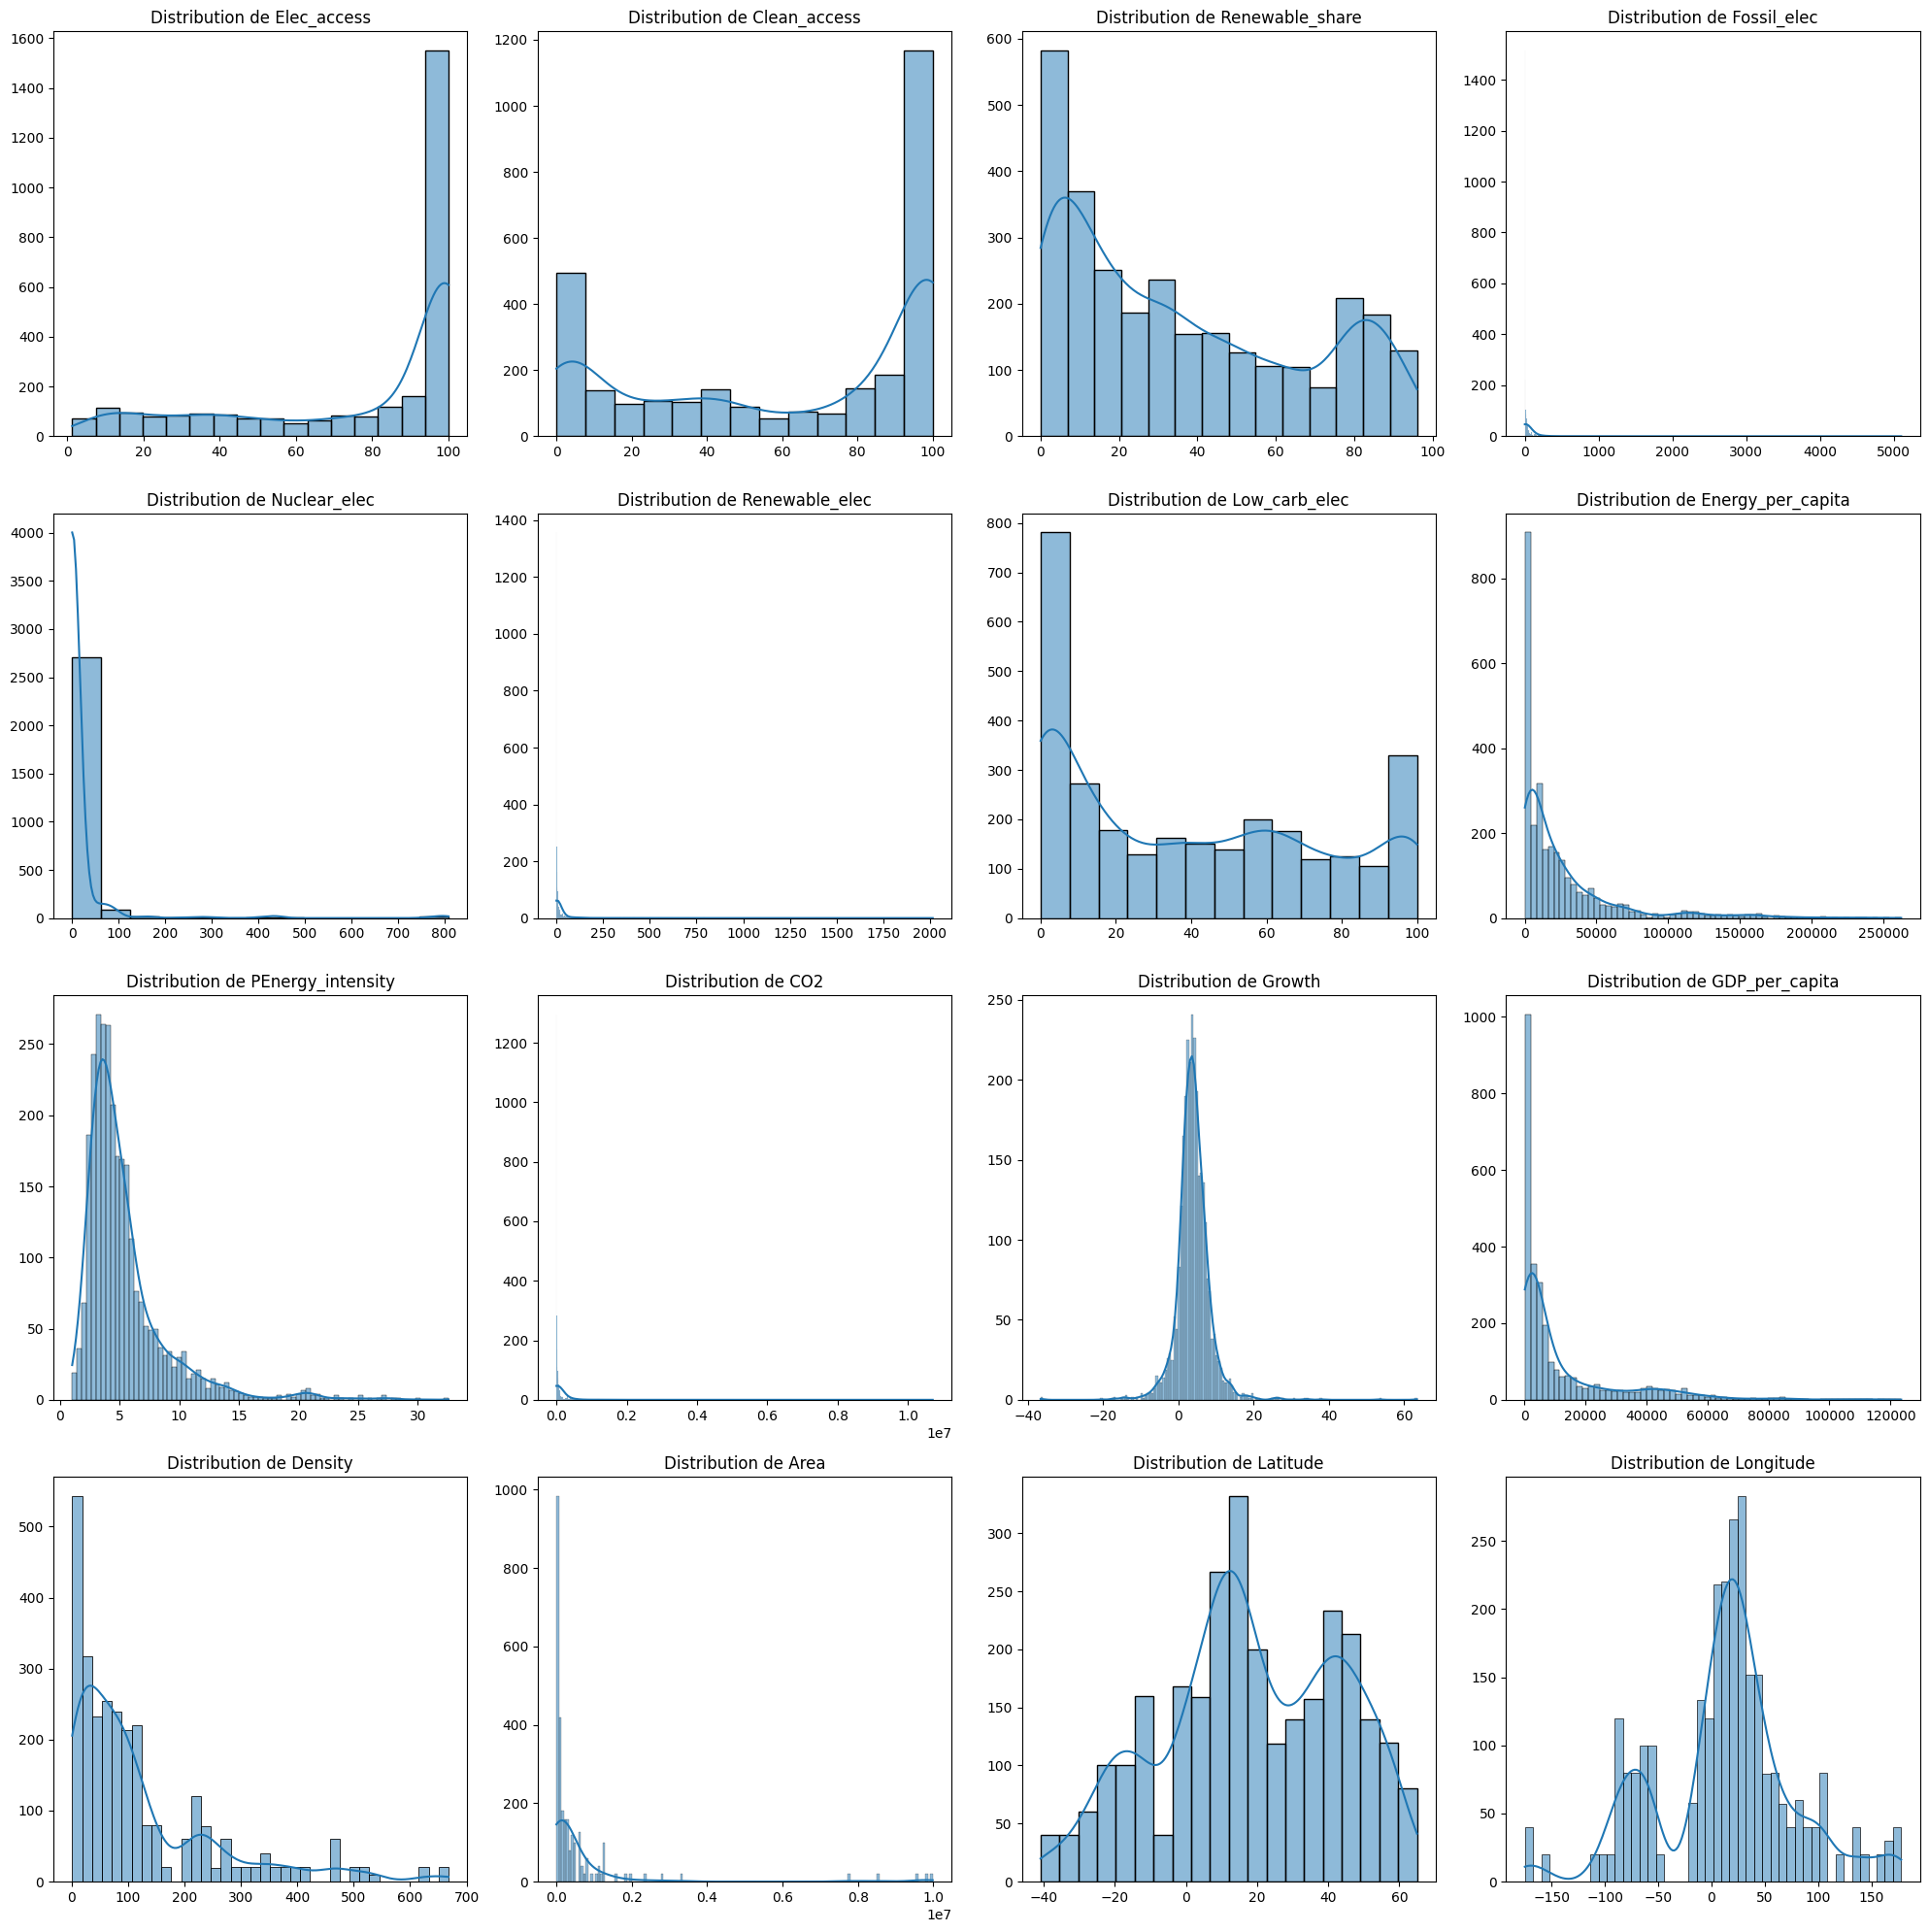

In [13]:
# Définir la taille de la figure pour les subplots
plt.figure(figsize=(20, 20))

# Sélectionner les colonnes numériques pour la visualisation
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(numeric_columns)

# Définir le nombre de colonnes et de lignes pour les subplots
n_cols = 4
n_rows = (num_plots + n_cols - 1) // n_cols  # Arrondir à l'entier supérieur pour s'assurer d'avoir assez de lignes

# Créer un subplot pour chaque variable quantitative
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel('')
    plt.ylabel('')

# Ajuster l'espacement entre les subplots pour une meilleure lisibilité
plt.tight_layout()
plt.show()


Interprétation : 

* Accès à l'électricité et à des combustibles propres : Ces variables montrent une distribution bimodale ou multimodale, indiquant des différences significatives dans l'accès à ces ressources entre différents pays sur différentes années. Des pics vers les valeurs élevées suggèrent que de nombreux pays ont réussi à fournir un accès presque universel, tandis que des creux sont visibles et symbolisent un accès limité.

* Part d'énergie renouvelable dans la consommation d'énergie : On observe que certaines valeurs sont concentrées vers le bas de l'échelle, indiquant des pays où l'énergie renouvelable. Elles constituent une petite partie de la consommation d'énergie. D'autres valeurs étalées vers des pourcentages plus élevés reflètent le fait que certains pays réalisent des efforts pour intégrer les énergies renouvelables.

* Consommation d'énergie primaire par habitant : Cette variable suit une distribution asymétrique avec une longue queue à droite, suggérant que la majorité des pays ont une consommation d'énergie par habitant assez faible, tandis qu'une minorité de pays (probablement des pays plus développés avec de plus grandes industries) ont des valeurs significativement plus élevées. 

* Intensité énergétique et émissions de CO2 : Ces variables montrent des distributions asymétriques, montrant des variations dans l'efficacité énergétique et les différences de niveaux d'émissions entre les pays. Les pays avec une intensité énergétique élevée ou des émissions de CO2 élevées peuvent indiquer une dépendance plus importante aux combustibles fossiles ou une efficacité énergétique moindre.

* Croissance du PIB et PIB par habitant : Ces distributions peuvent fournir des informations sur le développement économique et la répartition de la richesse entre les pays. Des asymétries dans ces distributions pourraient signifier que certains pays profitent d'une croissance économique significative et de niveaux de vie élevés, alors que d'autres restent dans des conditions de faible croissance.

Ces observations peuvent nous aider à identifier des tendances, des anomalies, ou des domaines nécessitant une étude plus approfondie. La manière dont ces variables se distribuent peut également suggérer des stratégies pour gérer les valeurs manquantes, transformer les données, ou choisir des modèles de machine learning adaptés à la nature de nos données.

Cepandant, certains graphiques ne sont pas très visibles avec cet affichage sous forme de subplots, nous allons zoomer sur certains histogrammes

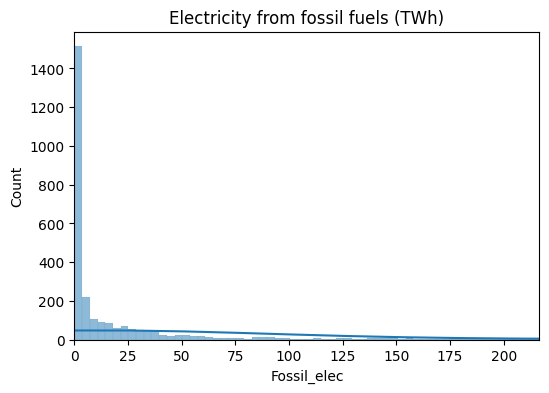

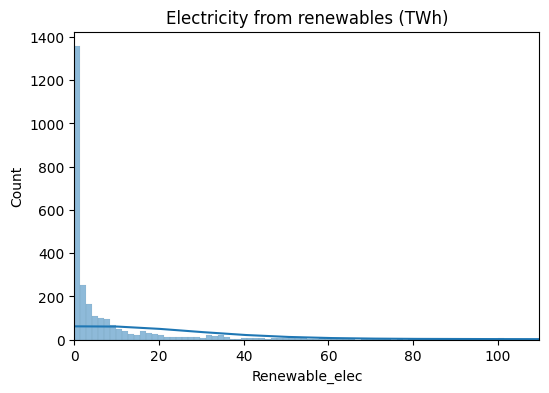

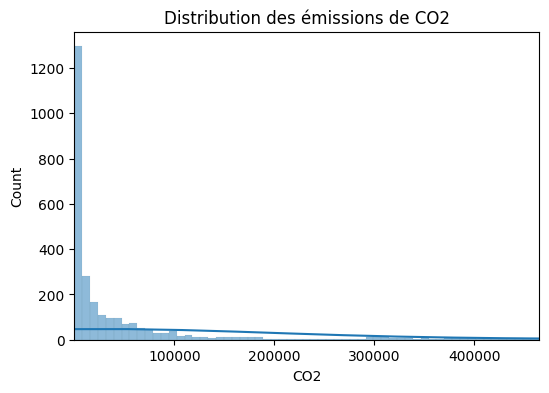

In [14]:
# Réglage de la taille de la figure pour chaque graphique
fig_size = (6, 4)

# Graphique pour 'Fossil_elec'
plt.figure(figsize=fig_size)
sns.histplot(data['Fossil_elec'], kde=True)
plt.title('Electricity from fossil fuels (TWh)')
plt.xlim(data['Fossil_elec'].min(), data['Fossil_elec'].quantile(0.95))
plt.show()

# Graphique pour 'Renewable_elec'
plt.figure(figsize=fig_size)
sns.histplot(data['Renewable_elec'], kde=True)
plt.title('Electricity from renewables (TWh)')
plt.xlim(data['Renewable_elec'].min(), data['Renewable_elec'].quantile(0.95))
plt.show()

# Graphique pour 'CO2'
plt.figure(figsize=fig_size)
sns.histplot(data['CO2'], kde=True)
plt.title('Distribution des émissions de CO2')
plt.xlim(data['CO2'].min(), data['CO2'].quantile(0.95))
plt.show()


Interprétation : 

* Électricité provenant des combustibles fossiles : Ce graphique montre la distribution des valeurs de production d'électricité à partir de combustibles fossiles à travers différents pays ou années. Cette distribution se concentrant sur la majorité des données, on observe que la production est généralement faible pour la plupart des observations, avec quelques exceptions plus élevées.

* Électricité provenant des énergies renouvelables : Cette distribution met en évidence la variabilité de la production d'électricité à partir de sources renouvelables. Comme pour l'électricité fossile, la plupart des valeurs sont relativement basses, reflétant probablement les efforts de transition énergétique en cours dans de nombreux pays.

* Emissions de CO2 : On observe que la plupart des pays ont des niveaux d'émissions relativement bas, avec une longue tendance plate à droite indiquant que quelques pays émettent des quantités significativement plus élevées de CO2. Cette distribution est asymétrique. 

### Transformation des variables

Avec les observations réalisées dans la partie précédente, nous pouvons nous demander s'il serait judicieux de transformer nos données. Nous pouvons nous demader ce que nous pourrions modifier sur celles-ci et ce que ces modifications pourraient apporter. 

* Réduction de l'asymétrie : Certaines de nos variables montrent une distribution asymétrique avec une queue à droite, ce qui indique une asymétrie positive. Une transformation logarithmique pourrait aider à réduire cette asymétrie, rendant la distribution plus proche d'une distribution normale. Cela est souvent une exigence ou une attente pour de nombreux modèles de régression et d'autres analyses statistiques.

* Gestion des valeurs extrêmes : Les valeurs extrêmes observées dans ces variables peuvent influencer de manière très importante les analyses statistiques et les modèles de prédiction. Les transformations peuvent réduire l'impact de ces valeurs extrêmes en les rapprochant du reste des données, améliorant ainsi la robustesse des modèles.

* Stabilisation de la variance : La variance des données peut augmenter avec l'augmentation des valeurs de la variable. Une transformation logarithmique peut aider à stabiliser la variance sur l'ensemble des données.

En résumé, pour notre projet, envisager des transformations pour ces variables quantitatives peut non seulement améliorer la qualité de nos analyses statistiques et de modélisation mais aussi aider à dériver des insights plus précis et fiables à partir de nos données. En particulier, une transformation logarithmique pourrait être une bonne piste d'amélioration.

Nous allons appliquer cette transformation logarithmique sur les colonnes suivantes : 'Fossil_elec', 'Renewable_elec', 'Energy_per_capita' et 'CO2'.

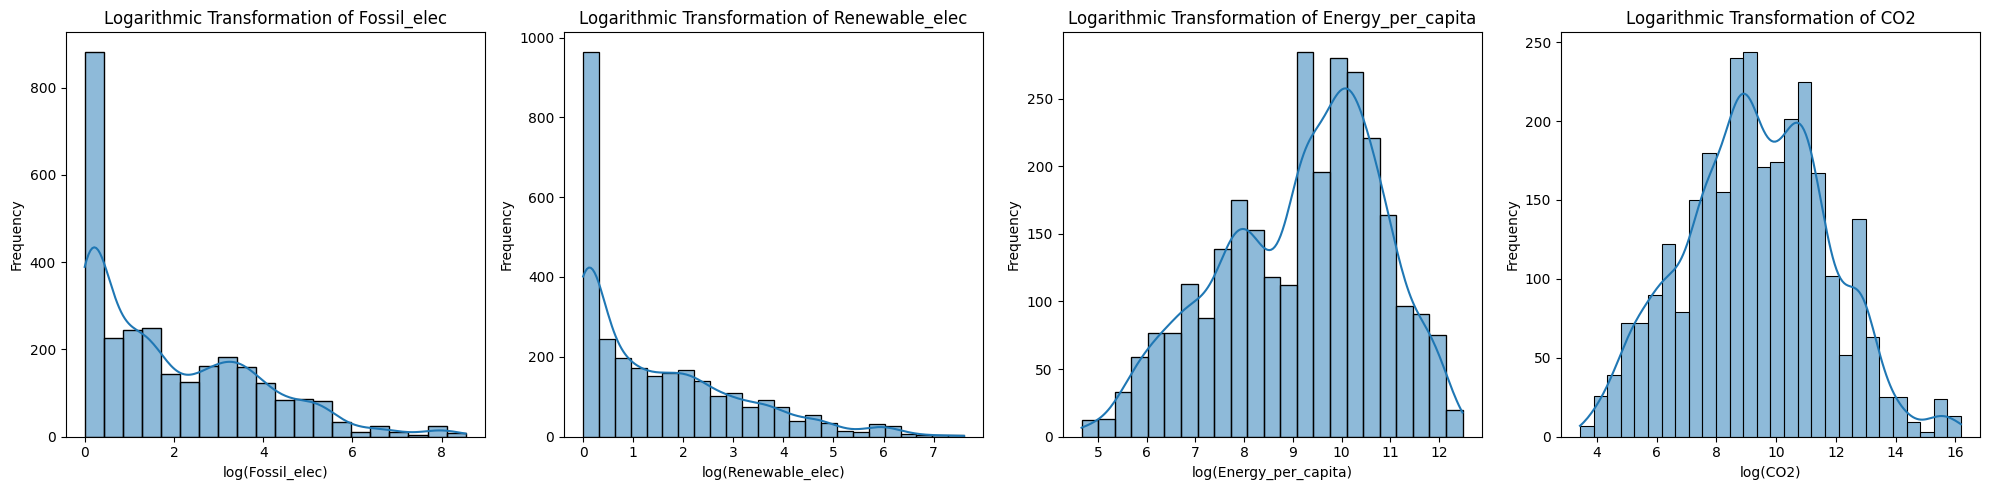

In [15]:
# Liste des colonnes à transformer
columns_to_transform = [
    'Fossil_elec', 
    'Renewable_elec', 
    'Energy_per_capita', 
    'CO2'
]

# Appliquer la transformation logarithmique avec ajustement pour les valeurs nulles
for col in columns_to_transform:
    data[f'log_{col}'] = np.log(data[col] + 1)  # +1 pour gérer les valeurs de 0

# Visualiser les distributions après transformation
plt.figure(figsize=(20, 5))

for i, col in enumerate(columns_to_transform, 1):
    plt.subplot(1, 4, i)
    sns.histplot(data[f'log_{col}'], kde=True)
    plt.title(f'Logarithmic Transformation of {col}')
    plt.xlabel(f'log({col})')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Interprétation : Après les transformations logarithmiques on remarque que

* La distribution de l'électricité provenant des combustibles fossiles, de l'électricité provenant des énergies renouvelables (TWh), de la consommation d'énergie primaire par habitant, et des émissions de CO2 est devenue plus symétrique et ressemble davantage à une distribution normale. On observe un résultat cohérent avec nos attentes.

* La transformation logarithmique a aidé à réduire l'effet des valeurs extrêmes, rendant les distributions moins asymétriques et facilitant potentiellement l'application de techniques statistiques et de modélisation qui supposent la normalité des données.

* Ces transformations peuvent améliorer la performance des modèles en rendant les relations entre les variables plus linéaires et en stabilisant la variance des erreurs.

### Etude des émissions de CO2

C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_40812\2175035840.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  co2_emissions_by_country = data.groupby('Entity')['CO2'].sum().sort_values(ascending=False)


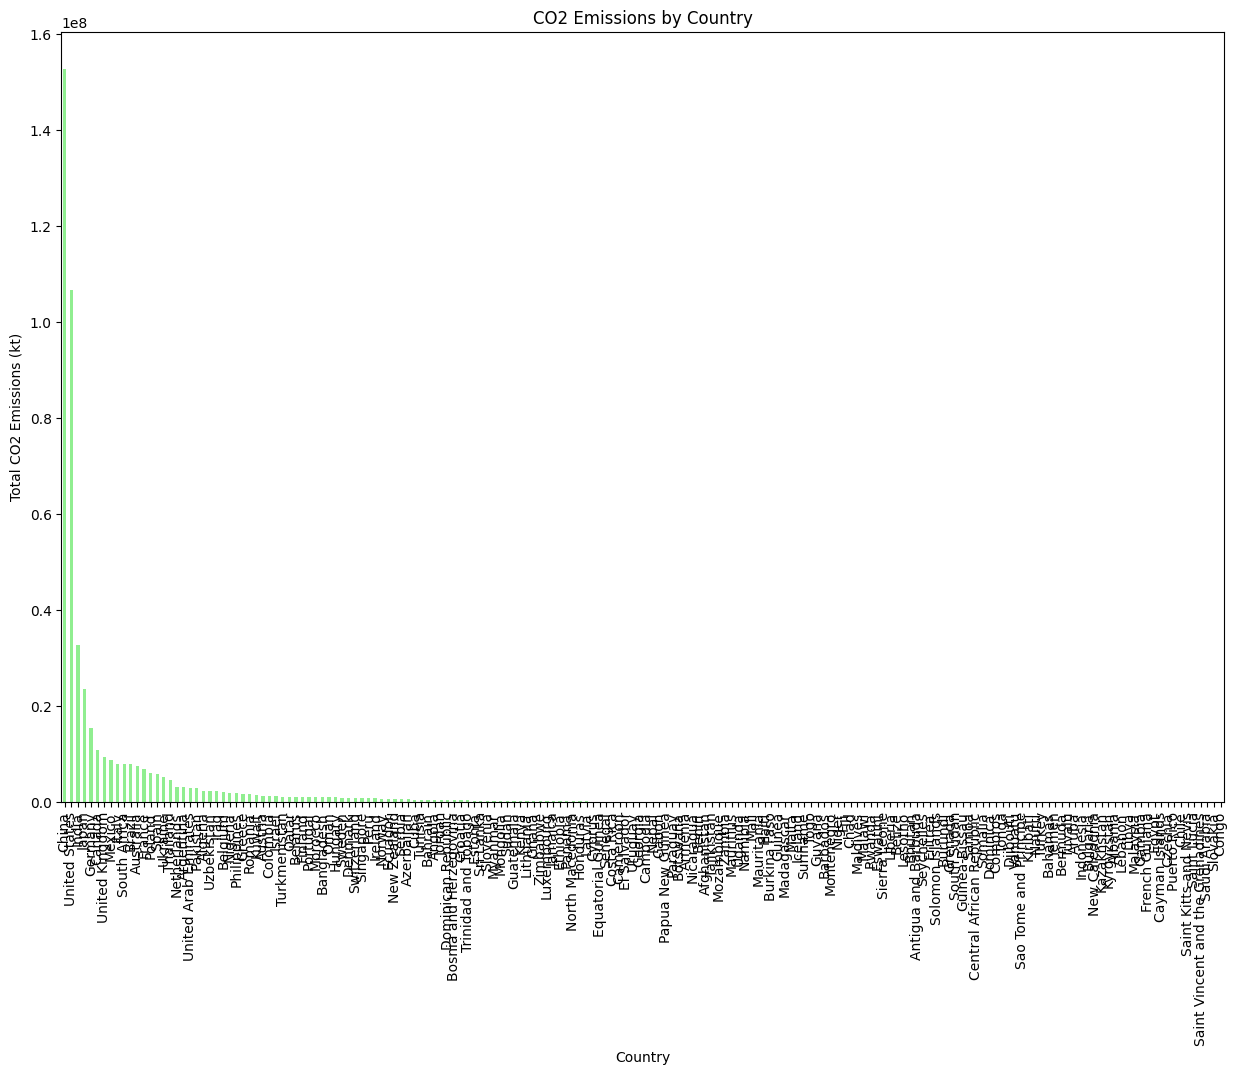

In [16]:
# Visualisation de l'hétérogénéité des émissions de CO2 pour tous les pays

plt.figure(figsize=(15, 10))

co2_emissions_by_country = data.groupby('Entity')['CO2'].sum().sort_values(ascending=False)

co2_emissions_by_country.plot(kind='bar', color='lightgreen')
plt.title('CO2 Emissions by Country')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (kt)')
plt.xticks(rotation=90)
plt.show()


Le graphique illustre clairement l'hétérogénéité des émissions de CO2 parmi les pays de notre jeu de données. On note une concentration très élevée des émissions parmi les premiers pays et une diminution significative à mesure que l'on avance vers les pays moins émetteurs. Cette distribution montre que quelques pays sont responsables d'une part disproportionnée des émissions globales de CO2, tandis que de nombreux autres pays contribuent relativement peu à ce total.

Aussi, on constante que certains pays ont une valeur d'émissiosn en CO2 nulle, pour pouvoir effectuer des calculs de ratio et autre, on distinguera pour la suite les 176 pays de notre jeu de données, parmis lesquels on compte 148 pays aux émissions non nulles.

In [17]:
# Calcul du ratio entre le pays le plus émetteur et le pays le moins émetteur
# Exclure les pays avec des émissions de CO2 égales à 0 avant de calculer le ratio
co2_emissions = co2_emissions_by_country[co2_emissions_by_country > 0] # on ne conserve que les pays aux émissions non nulles
max_emissions = co2_emissions.max()
min_emissions = co2_emissions.min()
emissions_ratio = max_emissions / min_emissions

emissions_ratio

print("Ratio entre le pays le plus émetteur et le pays le moins émetteur :", emissions_ratio)


Ratio entre le pays le plus émetteur et le pays le moins émetteur : 288175.1906836442


Interprétation : 

Le ratio des émissions totales de CO2 entre le pays le plus émetteur (Chine) et le pays le moins émetteur (Kyrgyzstan) est d'environ 288 175, mettant en évidence une différence extrême dans les contributions aux émissions globales de CO2. Cela souligne la concentration très élevée des émissions parmi un petit nombre de pays.

Nous rappelons que pour ce calcul, nous avons sélectionné le pays avec la plus petite valeur d'émission de CO2, mais non nulle, parmis les 176 pays.

In [18]:
# Initialiser la somme cumulée des émissions et le compteur de pays
cumulative_emissions = 0
countries_count = 0

# Trier les émissions par ordre croissant
sorted_emissions = co2_emissions_by_country[co2_emissions_by_country > 0].sort_values()
total_co2_emissions = co2_emissions_by_country[co2_emissions_by_country > 0].sum()

# Itérer sur les émissions de CO2 des pays pour calculer la somme cumulée
for emissions in sorted_emissions:
    cumulative_emissions += emissions
    countries_count += 1
    if cumulative_emissions / total_co2_emissions > 0.1:
        countries_count -= 1  # Ajuster pour ne pas compter le pays qui dépasse le seuil
        break


nbr_country = data['Entity'].nunique()

print("Nombre total de pays aux émissions non nulles :", nbr_country)
print("")
print("En classant les pays du moins émetteur au plus émetteur : ")
print("Nombre de pays dont la somme des émissions représente moins de 10% des émissions totales : ", countries_count)


Nombre total de pays aux émissions non nulles : 148

En classant les pays du moins émetteur au plus émetteur : 
Nombre de pays dont la somme des émissions représente moins de 10% des émissions totales :  125


Nous rappelons que sur la liste des 176 pays de notre jeu de données, 148 pays ont des émissions de CO2 non nulles. Ce sont ces 148 pays que nous étudions dans cette partie.

Interprétation :

On classe les 148 pays du moins émetteur en CO2 au plus émetteur. Si on somme les émissions des 125 pays les moins émetteurs de CO2, ces émissions ne dépassent pas 10% de la valeur totale à l'échelle mondiale. On en dduite que 90% des émissions en CO2 proviennent des 23 pays les plus émetteurs d'émissions à l'échelle mondiale.

Si on ramène cela à l'ensemble des pays de notre jeu de données, on obtient que les 147 pays les moins polluants rejettent 10% des émissions de CO2 mondiales.

Nous allons maintenant étudier les 5 pays les plus émetteurs.

C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_40812\1419189449.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  co2_emissions_by_country = data.groupby('Entity')['CO2'].sum().sort_values(ascending=False)


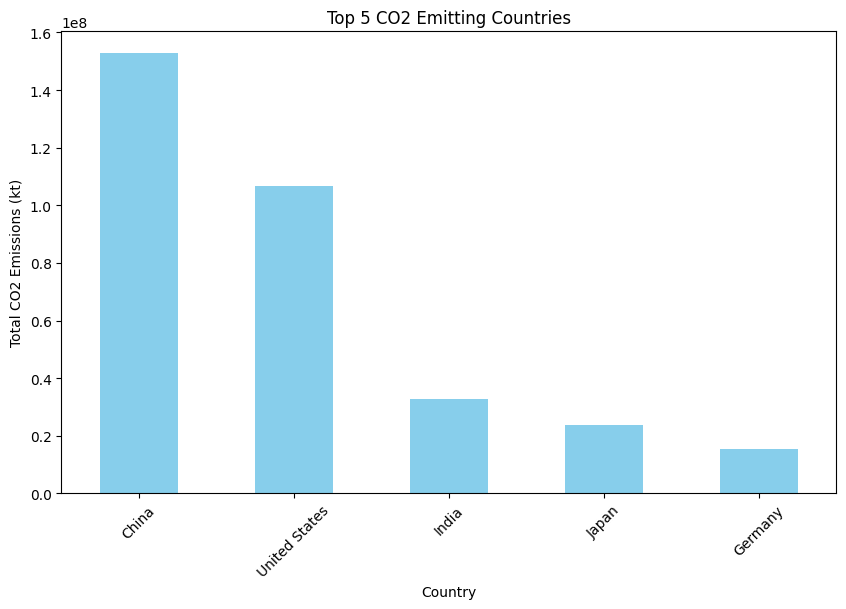

Entity
China            1.527328e+08
United States    1.065908e+08
India            3.267958e+07
Japan            2.367469e+07
Germany          1.547289e+07
Name: CO2, dtype: float64

In [19]:
# Grouper les données par pays et calculer la somme totale des émissions de CO2 pour chaque pays
co2_emissions_by_country = data.groupby('Entity')['CO2'].sum().sort_values(ascending=False)

# Sélectionner les 5 pays les plus émetteurs de CO2
top_5_co2_emitters = co2_emissions_by_country.head(5)

# Visualisation des 5 plus grands émetteurs de CO2
plt.figure(figsize=(10, 6))
top_5_co2_emitters.plot(kind='bar', color='skyblue')
plt.title('Top 5 CO2 Emitting Countries')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (kt)')
plt.xticks(rotation=45)
plt.show()

# Afficher les noms et les valeurs des 5 plus grands émetteurs de CO2
top_5_co2_emitters


In [20]:
# Calculer la somme des émissions des 5 pays les plus émetteurs
sum_top_5_co2_emitters = top_5_co2_emitters.sum()
print("Sommme des émissions des 5 pays les plus émetteurs :",sum_top_5_co2_emitters)
print("")

# Calculer le pourcentage que représente la somme des émissions des 5 pays les plus émetteurs par rapport aux émissions totales
percentage_top_5_co2_emitters = (sum_top_5_co2_emitters / co2_emissions_by_country.sum()) * 100
print("Pourcentage des émissions des 5 pays les plus polluants :", percentage_top_5_co2_emitters)


Sommme des émissions des 5 pays les plus émetteurs : 331150779.70289993

Pourcentage des émissions des 5 pays les plus polluants : 68.39546759559938


La visualisation montre clairement l'hétérogénéité des émissions de CO2 entre les pays, avec les 5 pays les plus émetteurs de CO2 étant :

* Chine avec environ 152 732 800 kt de CO2 émis.
* États-Unis avec environ 106 590 800 kt de CO2 émis.
* Inde avec environ 32 679 580 kt de CO2 émis.
* Japon avec environ 23 674 690 kt de CO2 émis.
* Allemagne avec environ 15 472 890 kt de CO2 émis.

Ces résultats mettent en évidence la grande disparité des contributions aux émissions de CO2 à l'échelle mondiale, avec la Chine et les États-Unis se distinguant nettement comme les plus grands émetteurs. Au total, les émissions des 5 pays les plus polluants représentent 331 150 779 kt de CO2 émis, c'est à dire 68% des émissions totales.

## Analyse descriptive multidimensionnelle des données

### Première visualisation globale


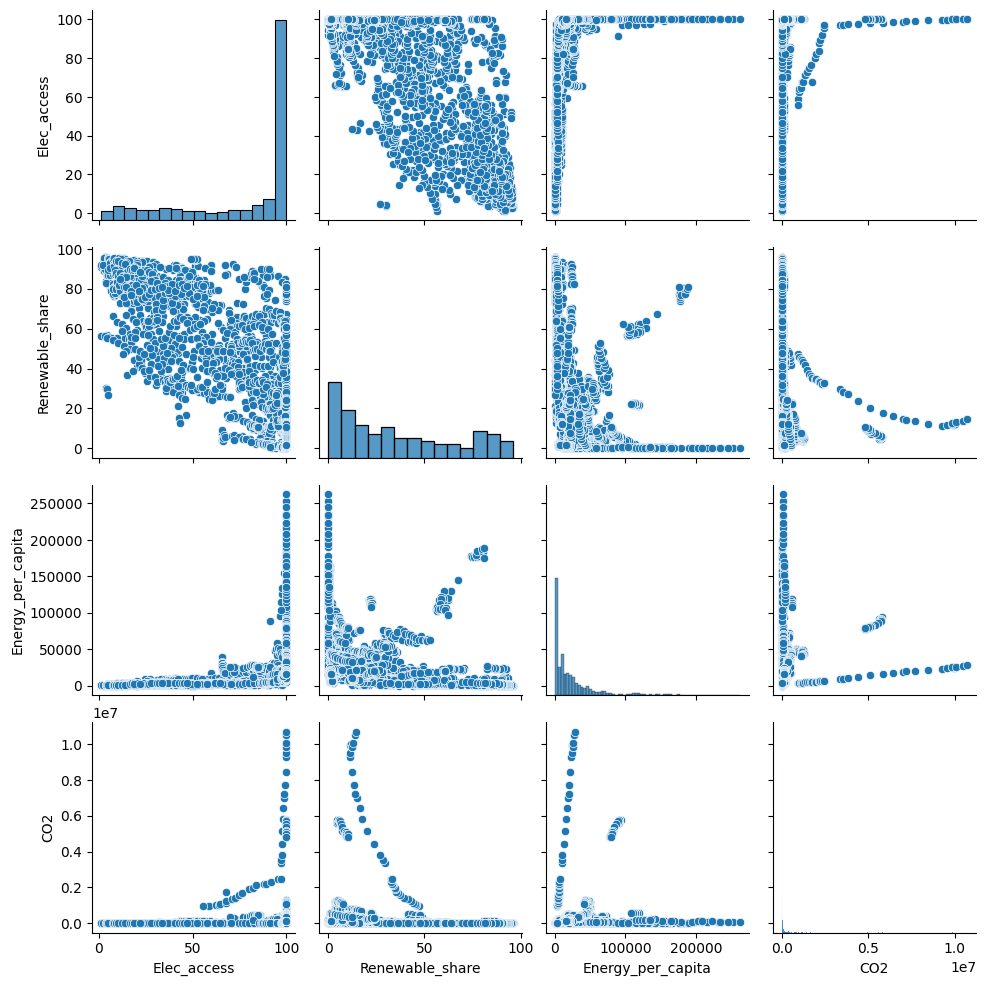

In [21]:
# Sélectionner quelques variables clés pour l'analyse
variables_to_analyze = [
    'Elec_access',
    'Renewable_share',
    'Energy_per_capita',
    'CO2'
]

# Créer des scatter plots pour chaque paire de variables
sns.pairplot(data[variables_to_analyze])
plt.show()


Interprétation : 

Les scatter plots ci-dessus montrent les relations entre quatre variables clés de notre jeu de données : l'accès à l'électricité, la part de l'énergie renouvelable dans la consommation finale d'énergie, la consommation d'énergie primaire par habitant et les émissions totales de CO2 par pays.

* Accès à l'électricité vs. Autres Variables : Il semble y avoir une augmentation des émissions de CO2 et de la consommation d'énergie primaire par habitant à mesure que l'accès à l'électricité augmente. Cela peut indiquer que les pays plus développés, avec un meilleur accès à l'électricité, ont tendance à consommer plus d'énergie et à émettre plus de CO2.

* Part de l'énergie renouvelable vs. Émissions de CO2 : Il n'y a pas de relation clairement visible dans le scatter plot. Cela suggère que la part des énergies renouvelables dans la consommation finale d'énergie ne semble pas être directement corrélée aux émissions totales de CO2 par pays. Ceci pourrait indiquer que d'autres facteurs, tels que l'efficacité énergétique, la mixité des sources d'énergie et la taille de l'économie, jouent un rôle important. Nous pouvons vérifier cette hypothèse en étudiant ces corrélations. 

* Consommation d'énergie primaire par habitant vs. Émissions de CO2 : Comme attendu, il semble exister une relation positive entre la consommation d'énergie primaire par habitant et les émissions totales de CO2. Cela reflète le fait que les pays avec une consommation d'énergie par habitant plus élevée tendent à avoir des émissions de CO2 plus importantes, probablement en raison d'une activité économique plus présente et d'une plus grande utilisation des combustibles fossiles.

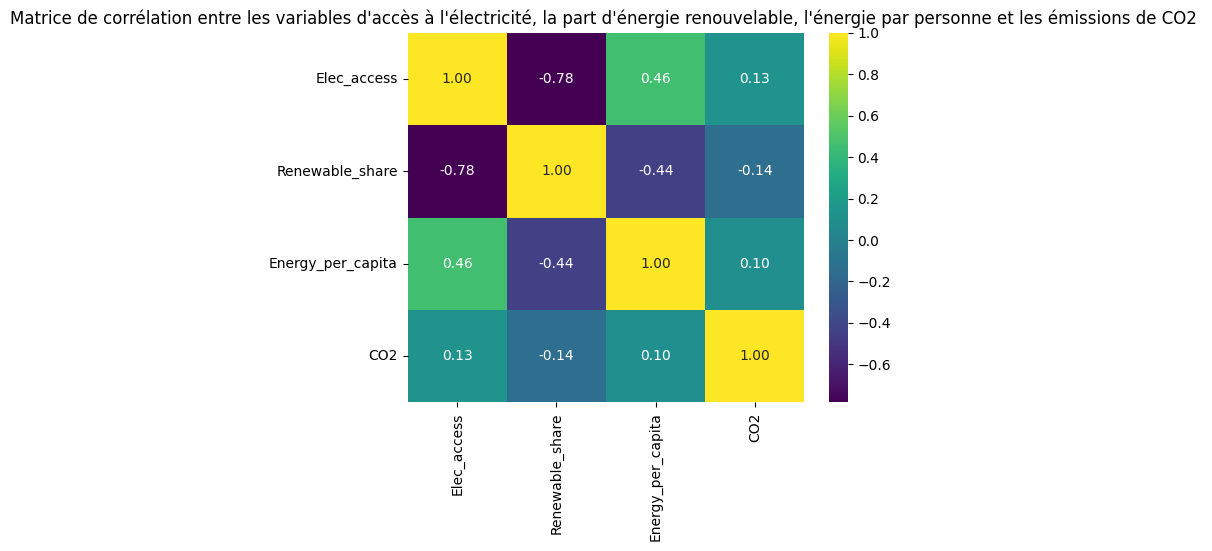

In [22]:
# Calculer le coefficient de corrélation de Pearson entre les variables sélectionnées
correlation_matrix = data[variables_to_analyze].corr()

# Afficher la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Matrice de corrélation entre les variables d'accès à l'électricité, la part d'énergie renouvelable, l'énergie par personne et les émissions de CO2 ")
plt.show()


Interprétation : 

La matrice de corrélation ci-dessus montre les coefficients de corrélation entre les variables.

* Accès à l'électricité : Cette variable ne montre pas de corrélation forte avec les émissions de CO2 ou la part de l'énergie renouvelable, ce qui suggère que l'accès universel à l'électricité peut être atteint indépendamment des niveaux d'émissions de CO2 ou de la part des énergies renouvelables, et ce qui paraît cohérent.

* Part de l'énergie renouvelable : La corrélation entre la part de l'énergie renouvelable dans la consommation finale d'énergie et les émissions de CO2 est faible, indiquant que l'augmentation de la part des énergies renouvelables n'est pas directement liée à une réduction des émissions de CO2 au niveau des données analysées. Cela pourrait refléter le fait que d'autres facteurs, tels que l'efficacité énergétique et le mix énergétique global, affectent également les émissions.

* Consommation d'énergie primaire par habitant : Il existe une corrélation positive modérée avec les émissions de CO2, ce qui est cohérent avec l'idée que des niveaux de consommation d'énergie plus élevés sont associés à des émissions plus importantes. Cette relation souligne l'importance de l'efficacité énergétique et de la transition vers des sources d'énergie moins carbonées pour réduire les émissions.

Ces résultats montrent les relations entre l'accès à l'électricité, la part des énergies renouvelables, la consommation d'énergie et les émissions de CO2. Ils suggèrent que, bien que l'augmentation de la part des énergies renouvelables soit importante pour un avenir durable, des efforts supplémentaires en matière d'efficacité énergétique et de réduction de la consommation d'énergie sont nécessaires pour atteindre une réduction significative des émissions de CO2. 

Nous allons vérifier cette hypothèse en étudiant les corrélations entre d'autres variables.

### Etude de la corrélation entre les énergies fossiles et les émissions de CO2

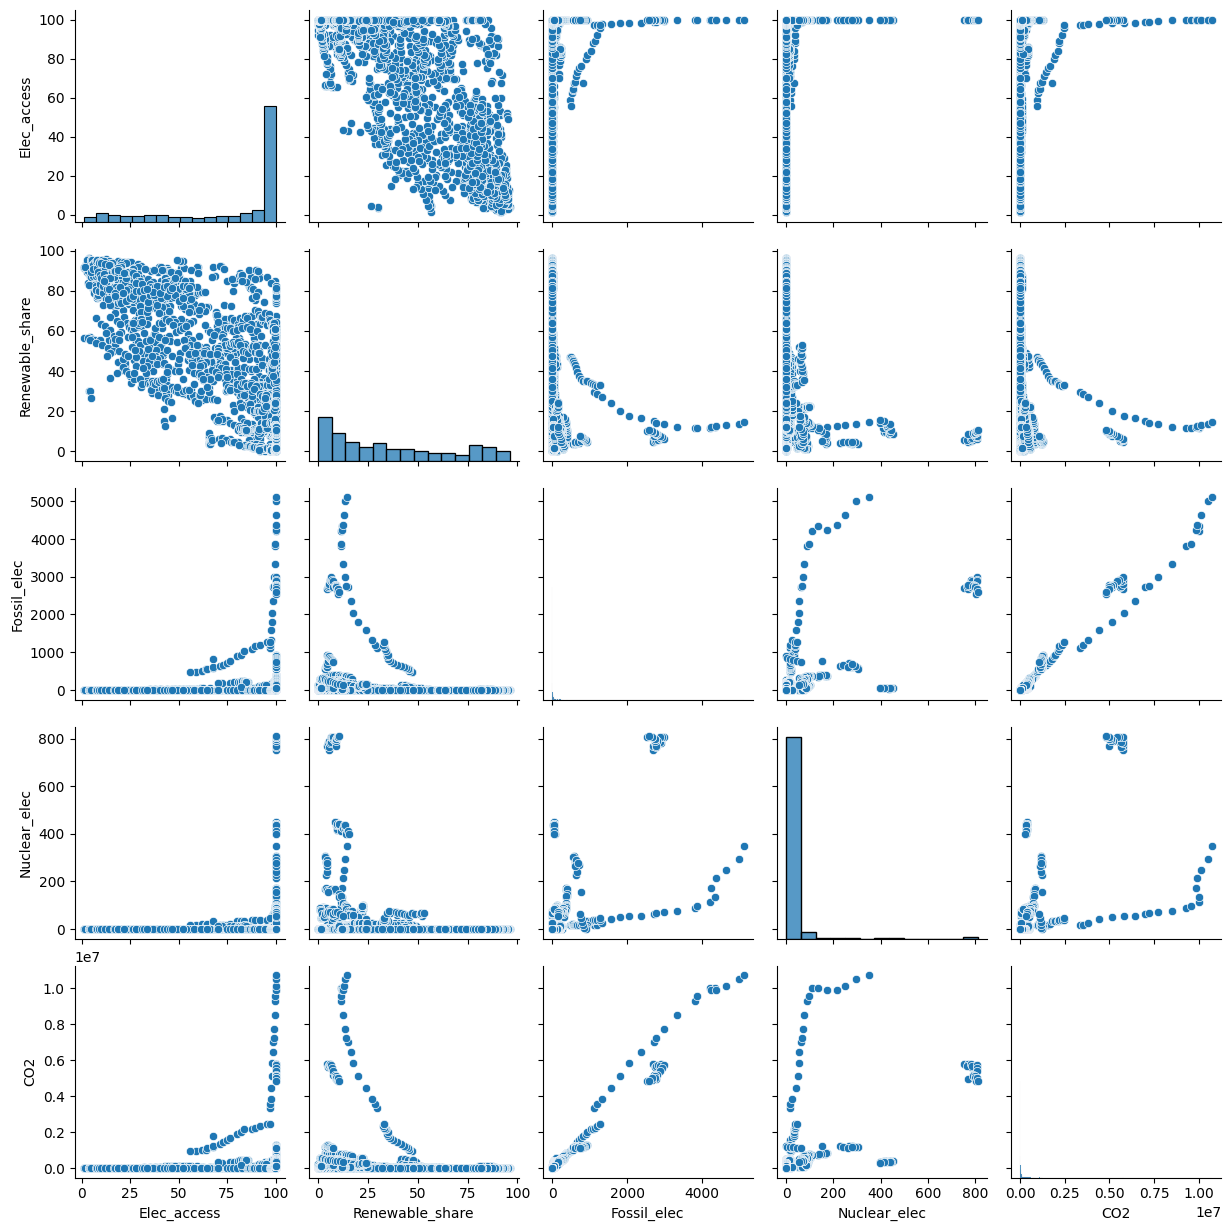

In [23]:
# Sélectionner quelques variables clés pour l'analyse
variables_to_analyze = [
    'Elec_access',
    'Renewable_share',
    'Fossil_elec',
    'Nuclear_elec',
    'CO2'
]

# Créer des scatter plots pour chaque paire de variables
sns.pairplot(data[variables_to_analyze])
plt.show()

Interprétation : 

* Accès à l'électricité (Elec_access): Les pays avec un meilleur accès à l'électricité ont tendance à avoir une plus grande consommation d'énergie (Fossil_elec, Nuclear_elec) et des émissions de CO2 plus élevées, ce qui est cohérent avec une consommation d'énergie plus importante dans les pays développés.

* Part des énergies renouvelables (Renewable_share): On observe une grande variabilité dans la part des énergies renouvelables entre les pays, sans tendance claire reliant cette part à la consommation d'énergie fossile, nucléaire ou aux émissions de CO2. Cela peut indiquer que les pays adoptent des stratégies énergétiques diversifiées.

* Électricité fossile (Fossil_elec): Il semblerait y avoir une relation positive entre l'électricité générée à partir de combustibles fossiles et les émissions de CO2, ce qui est attendu étant donné que la combustion d'énergies fossiles est une source majeure d'émissions de CO2.

* Électricité nucléaire (Nuclear_elec): Les données montrent que certains pays ont une capacité significative de production d'électricité nucléaire, mais cette capacité ne semble pas être directement liée à des émissions de CO2 plus faibles ou plus élevées. Cela peut refléter le fait que l'énergie nucléaire elle-même ne produit pas de CO2, mais d'autres facteurs influencent les émissions totales d'un pays.

* Émissions de CO2 (CO2): Les pays avec des émissions élevées de CO2 ont tendance à avoir une consommation d'énergie plus importante, que ce soit à partir de combustibles fossiles ou d'énergie nucléaire. Cela indique que les efforts de réduction des émissions pourraient nécessiter une attention particulière à la fois sur l'efficacité énergétique et sur les sources d'énergie.

Ces observations mettent en évidence les interrelations complexes entre l'accès à l'électricité, les choix énergétiques des pays, et leurs impacts sur les émissions de CO2. Une stratégie globale pour réduire les émissions de CO2 devra probablement prendre en compte ces différents aspects pour être efficace.

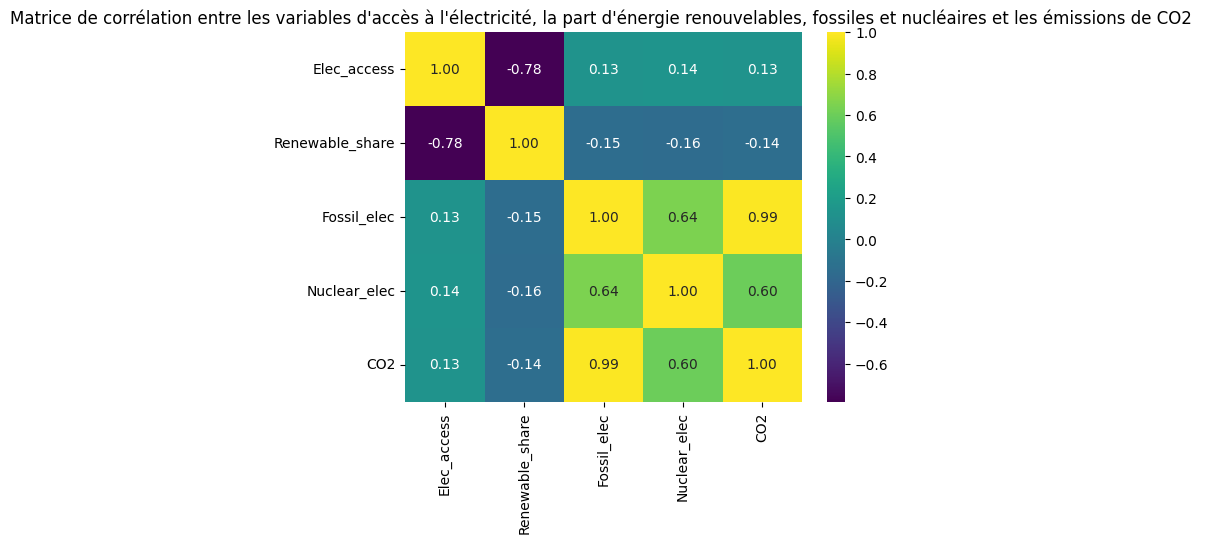

In [24]:
# Calculer le coefficient de corrélation entre les variables sélectionnées
correlation_matrix = data[variables_to_analyze].corr()

# Afficher la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Matrice de corrélation entre les variables d'accès à l'électricité, la part d'énergie renouvelables, fossiles et nucléaires et les émissions de CO2 ")
plt.show()


Interprétation : 

La matrice de corrélation montre les relations entre l'accès à l'électricité, la part des énergies renouvelables, et l'utilisation d'énergie fossile et nucléaire avec les émissions de CO2. On observe : 

* Une corrélation négative forte entre l'accès à l'électricité et la part d'énergie renouvelable, suggérant que les pays bien électrifiés pourraient avoir une plus faible proportion d'énergie renouvelable dans leur mix énergétique.

* La consommation d'énergie fossile est très corrélée avec les émissions de CO2, indiquant que les pays qui consomment plus d'énergie de ces sources ont tendance à émettre plus de CO2. Il en est de même pour la part d'énergie nucléaire, même si cette énergie n'émet pas de CO2 directement. 

* Les énergies renouvelables montrent une faible corrélation négative avec les émissions de CO2, ce qui peut indiquer que l'augmentation de la part d'énergie renouvelable ne se traduit pas nécessairement par une baisse proportionnelle des émissions de CO2 à l'échelle des données analysées. Cela peut être du à l'utilisation en parallèle d'énergie fossile.

Cette matrice des corrélations souligne le rôle des combustibles fossiles dans les émissions de CO2 et suggère que les politiques en faveur des énergies renouvelables pourraient ne pas avoir un impact immédiat sur les émissions de CO2 sans autres changements dans le mix énergétique et l'efficacité énergétique.

De plus, cette analyse confirme les hypothèses émises dans la première visualisation globale.








### Etude de l'influence économique et démographique

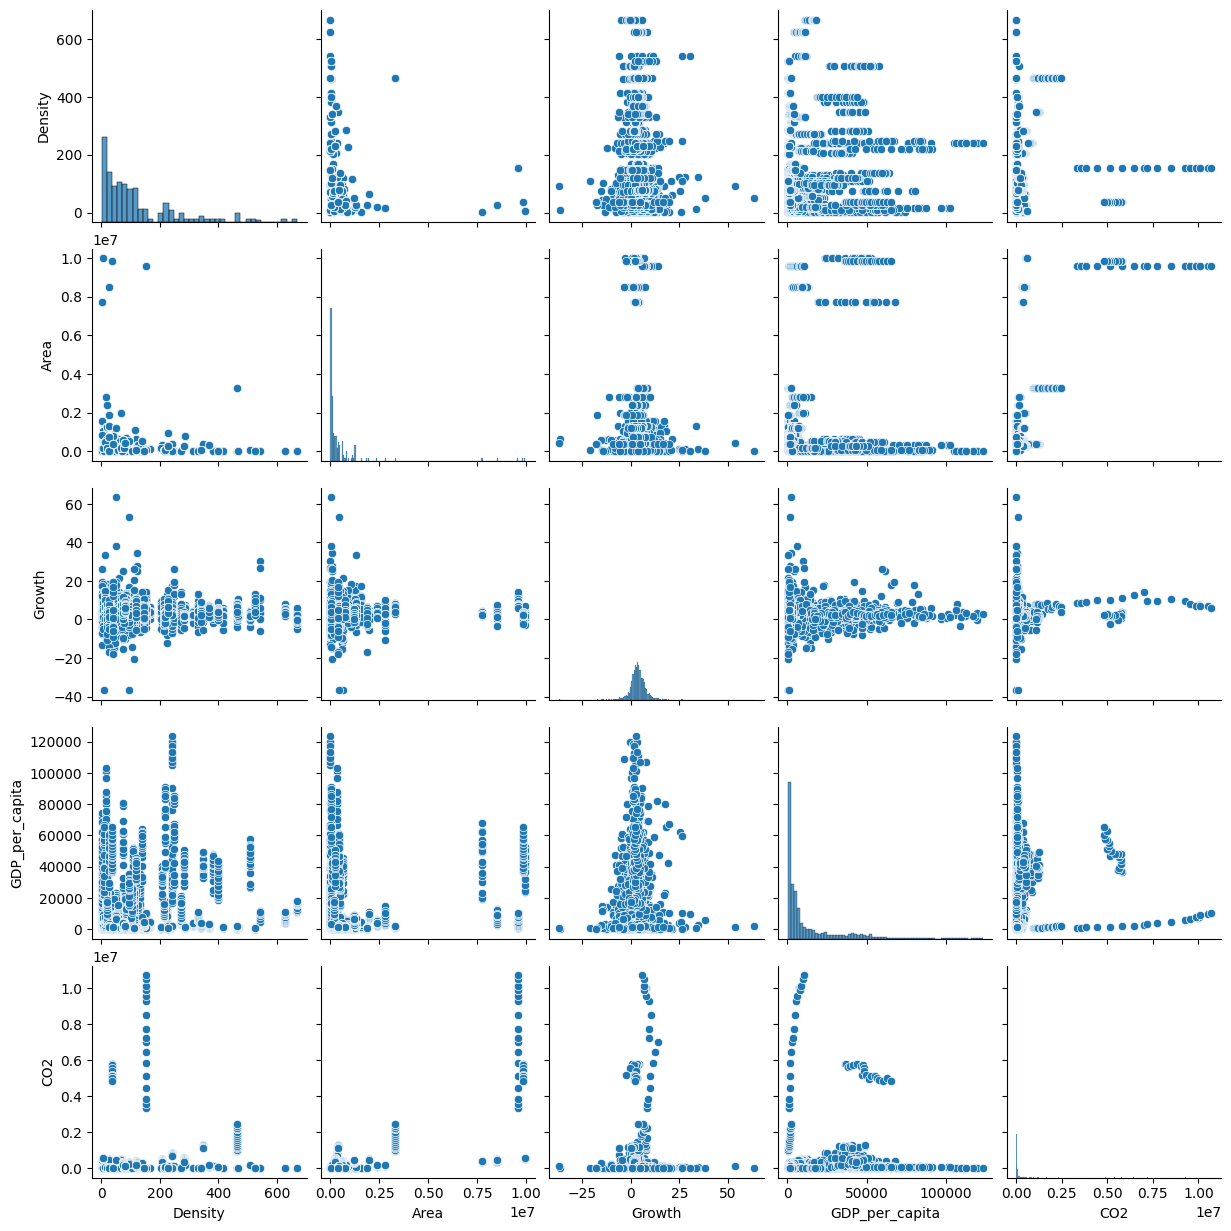

In [25]:
# Sélectionner quelques variables clés pour l'analyse
variables_to_analyze = [
    'Density',
    'Area',
    'Growth',
    'GDP_per_capita',
    'CO2'
]

# Créer des scatter plots pour chaque paire de variables
sns.pairplot(data[variables_to_analyze])
plt.show()

Interprétation : 

* Densité de population (Density) : Il n'y a pas de tendance claire indiquant une relation directe entre la densité de population et les autres variables. Il y a cependant quelques valeurs extrêmes, ce qui indique que certains pays ou régions ont des densités de population très élevées.

* Superficie (Area) : La superficie ne semble pas être directement liée à la croissance économique (Growth), au PIB par habitant (GDP_per_capita), ou aux émissions de CO2. Les données semblent être assez dispersées, ce qui suggère que la taille d'un pays n'est pas un facteur déterminant pour ces indicateurs.

* Croissance économique (Growth) : La croissance économique présente une variabilité importante parmi les pays, sans une relation évidente avec le PIB par habitant ou les émissions de CO2. 

* PIB par habitant (GDP_per_capita) : Le PIB par habitant montre un certain regroupement vers les valeurs inférieures, avec quelques valeurs extrêmes indiquant que certains pays ont un PIB par habitant beaucoup plus élevé. Il y a également une dispersion des points lorsque le PIB par habitant est comparé aux émissions de CO2, suggérant que la richesse d'un pays ne se traduit pas toujours par des émissions de CO2 proportionnellement plus élevées.

* Émissions de CO2 (CO2) : Les émissions de CO2 sont concentrées vers les valeurs inférieures avec quelques valeurs extrêmes, indiquant que quelques pays sont responsables d'une part disproportionnée des émissions globales de CO2. Il n'y a pas de relation claire et linéaire visible entre les émissions de CO2 et les autres variables dans ces scatter plots.

En conclusion, ces visualisations illustrent les relations entre les indicateurs démographiques, économiques et environnementaux. Les données suggèrent que des facteurs autres que la densité de population, la taille du pays, et la richesse économique influencent les émissions de CO2. Ces résultats peuvent servir de point de départ pour des analyses statistiques plus poussées et la modélisation prédictive.

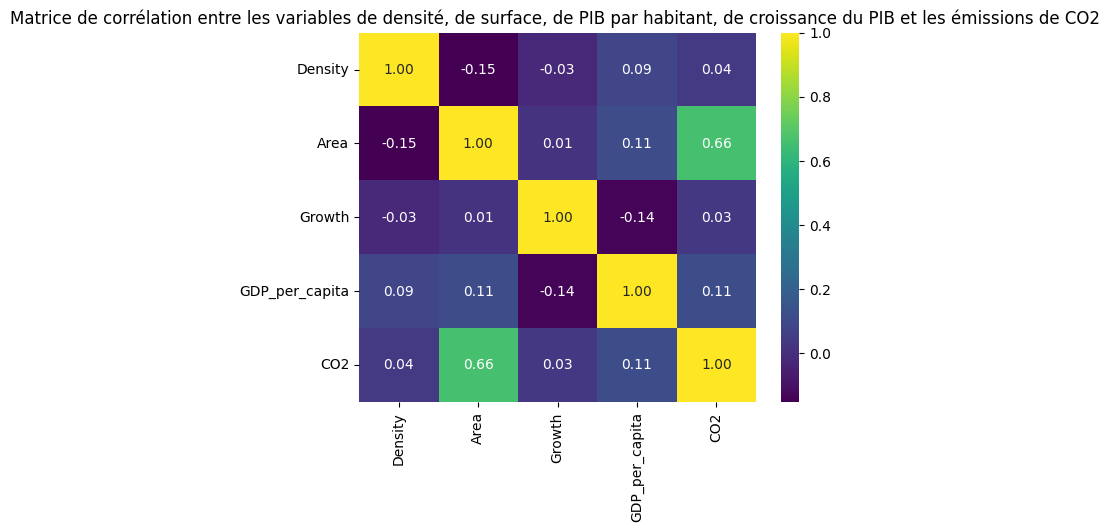

In [26]:
# Calculer le coefficient de corrélation entre les variables sélectionnées
correlation_matrix = data[variables_to_analyze].corr()

# Afficher la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Matrice de corrélation entre les variables de densité, de surface, de PIB par habitant, de croissance du PIB et les émissions de CO2 ")
plt.show()

Interprétation : 

La matrice de corrélation indique les relations entre la densité de population, la superficie du pays, le PIB par habitant, la croissance du PIB et les émissions de CO2 :

* Densité vs. Superficie : Une corrélation négative (-0.15) suggère que les pays de plus grande superficie ont tendance à avoir une densité de population plus faible. Ce qui est cohérent.

* Densité vs. Émissions de CO2 : Une corrélation très faible (0.04) indique qu'il n'y a pas de lien direct entre la densité de la population et les émissions de CO2.

* Superficie vs. Émissions de CO2 : Une corrélation modérée (0.66) suggère que les pays avec de plus grandes superficies ont tendance à avoir des émissions de CO2 plus élevées, ce qui pourrait refléter une activité économique et industrielle plus importante ou une plus grande utilisation de véhicules et d'énergie.

* Croissance du PIB vs. PIB par habitant : Une corrélation négative (-0.14) montre qu'une croissance économique plus élevée n'est pas nécessairement associée à un PIB par habitant plus élevé, ce qui peut se produire dans les économies en développement.

* PIB par habitant vs. Émissions de CO2 : Une corrélation positive faible (0.11) indique que les pays plus riches pourraient avoir légèrement plus d'émissions de CO2, mais la relation n'est pas forte, ce qui implique que la richesse n'est pas un prédicteur direct des émissions de CO2.

* Superficie vs. PIB par habitant : Une corrélation positive faible (0.11) indique que les pays plus grands ont tendance à avoir un PIB par habitant légèrement plus élevé.

En résumé, cette matrice montre que si certaines variables ont une relation modérée, beaucoup n'ont qu'une faible ou pas de corrélation directe. Cela suggère que des facteurs supplémentaires pourraient influencer ces relations et confirme les observations précédentes.

## Analyse en Composantes Principales (ACP)

Dans cette partie, nous allons procéder à une Analyse en Composantes Principales (ACP). L'objectif de cette méthode est de synthétiser les variables du jeu de donbnées initial en un nombre limité de composantes principales, tout en conservant un maximun d'informations. Initialement, nous avons 18 variables après traitement, qui correspondent aux 18 caractéristiques. Nous allons étudier s'il est possible de réduire cette dimension, tout en conservant un maximum d'information.

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Reformatage des données

In [51]:
# Pour l'ACP, on ne garde que les variables quantitatives
data_quanti = data.iloc[:, 2:18].copy()
data_quanti.head()

,Elec_access,Clean_access,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,Low_carb_elec,Energy_per_capita,PEnergy_intensity,CO2,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
3,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953
5,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.93911,67.709953
6,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.93911,67.709953
7,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60.0,652230.0,33.93911,67.709953


L'ACP est sensible à la variabilité des données. Si les variables sont mesurées dans des unités différentes ou ont des variances différentes, celles avec une plus grande variance ou des unités plus grandes pourraient dominer les premières composantes principales. En centrant et réduisant, chaque variable contribue également à l'analyse sans être influencée par l'échelle de mesure. Nous décidons donc de centrer et réduire nos données avant de réaliser notre ACP.

In [52]:
# Initialisation du StandardScaler
scaler = StandardScaler()

# Centrer et réduire les données
data_quanti_scaled = scaler.fit_transform(data_quanti)

# Convertir de nouveau en DataFrame pour garder le format DataFrame
data_quanti_scaled = pd.DataFrame(data_quanti_scaled, columns=data_quanti.columns)

# Afficher les premières lignes pour vérifier
data_quanti_scaled.head()


,Elec_access,Clean_access,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,Low_carb_elec,Energy_per_capita,PEnergy_intensity,CO2,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
0,-1.963065,-1.342539,0.028580,-0.204041,-0.194725,-0.241340,0.795146,-0.697002,-1.123384,-0.204918,1.062898,-0.661410,-0.46531,-0.003482,0.633961,0.836135
1,-1.793997,-1.306853,0.281088,-0.203987,-0.194725,-0.241990,0.676131,-0.697696,-1.179300,-0.205151,-0.534190,-0.660305,-0.46531,-0.003482,0.633961,0.836135
2,-1.624946,-1.273717,-0.064029,-0.203961,-0.194725,-0.241712,0.691211,-0.696406,-1.120588,-0.204515,1.579053,-0.658668,-0.46531,-0.003482,0.633961,0.836135
3,-1.455836,-1.231659,-0.130321,-0.204335,-0.194725,-0.241247,1.061314,-0.694995,-1.095426,-0.204258,0.314777,-0.657509,-0.46531,-0.003482,0.633961,0.836135
4,-1.286582,-1.194699,-0.233923,-0.204335,-0.194725,-0.240225,1.141343,-0.693650,-1.087039,-0.204246,2.138087,-0.652385,-0.46531,-0.003482,0.633961,0.836135


### Analyse en Composantes Principales

In [53]:
pca = PCA(10)  # projection from 18 to 10 dimensions
projected = pca.fit_transform(data_quanti_scaled)

eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x+1) for x in range(10)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,4.497847,28.0,28.0
1,Dim2,3.205793,20.0,48.0
2,Dim3,1.373984,9.0,57.0
3,Dim4,1.325275,8.0,65.0
4,Dim5,1.037927,6.0,71.0
5,Dim6,0.908151,6.0,77.0
6,Dim7,0.851153,5.0,82.0
7,Dim8,0.726137,5.0,87.0
8,Dim9,0.640907,4.0,91.0
9,Dim10,0.527988,3.0,94.0


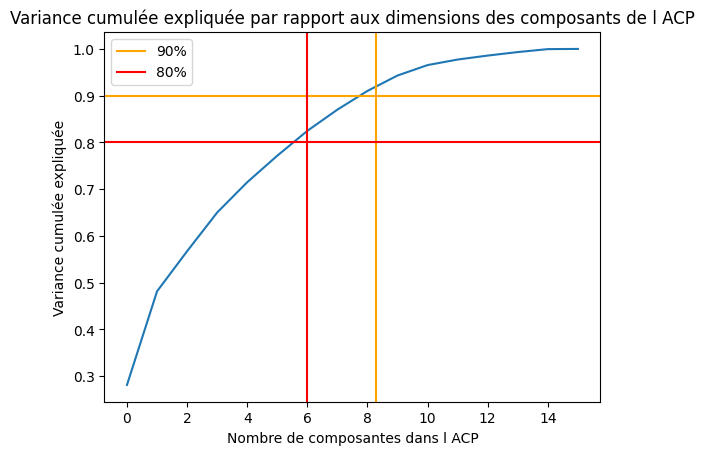

In [54]:
pca = PCA().fit(data_quanti_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.axvline(x=8.3,color='orange', label='90%')
plt.axhline(y=0.9,color='orange')

plt.axvline(x=6,color='red', label='80%')
plt.axhline(y=0.8,color='red')

plt.title('Variance cumulée expliquée par rapport aux dimensions des composants de l ACP')
plt.xlabel('Nombre de composantes dans l ACP')
plt.ylabel('Variance cumulée expliquée') 
plt.legend()
plt.show()

Interprétation :

* Dans un premier temps, le tableau nous présente la varianxce expliquée pour chaque dimension, ainsi que le pourcentage que cela représente. La dernière colonne nous donne les pourcentages de variances cumulées. En général, on peut se satisfaire de dimension représentant 80% de la variance cumulée. Ici, cela reviendrait à garder 7 composantes principales. Si on souhaite plus de précision, avec 90% de la variance cumulée, on peut alors garder 9 composantes principales. Cependant, on observe que les 2 premières composantes portent beaucoup d'information (48% de la variance cumulée), cela montre que ces 2 composantes portent à elles-seules la moitié de information.

* Le graphique nous permet de vérifier ces observations. On remarque qu'à partir d'un certain seuil (environ 90%), il faut rajouter beaucoup de composantes dans l'ACP pour gagner de l'information sur la variance cumulée.

On décide dans un premier temps de conserver les 7 premières composantes principales.

### Etude des composantes principales

Nous allons construire un nouveau dataframe avec les 7 premiers composantes de l'ACP. Comme présenté ci-dessus, cela nous permeter d'expliquer 80% de la variance.

In [55]:
# Transformation en DataFrame des résultats de l'ACP
data_pca = pd.DataFrame({
    "Dim1" : projected[:,0], 
    "Dim2" : projected[:,1],
    "Dim3" : projected[:,2],
    "Dim4" : projected[:,3],
    "Dim5" : projected[:,4],
    "Dim6" : projected[:,5],
    "Dim7" : projected[:,6],
   
})

# Résultat (premières lignes)
data_pca.head()

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7
0,-1.665553,1.079336,0.162953,0.319407,0.005793,1.726026,-0.350690
1,-1.584802,0.936005,-0.041359,-0.411430,-0.491401,0.825895,-1.162445
2,-1.523292,0.950963,0.116754,0.594006,0.267660,2.016767,-0.086157
3,-1.402231,0.812577,0.115121,-0.161514,-0.118988,1.427433,-0.691230
4,-1.399718,0.877104,0.308308,0.626821,0.484427,2.520863,0.243621


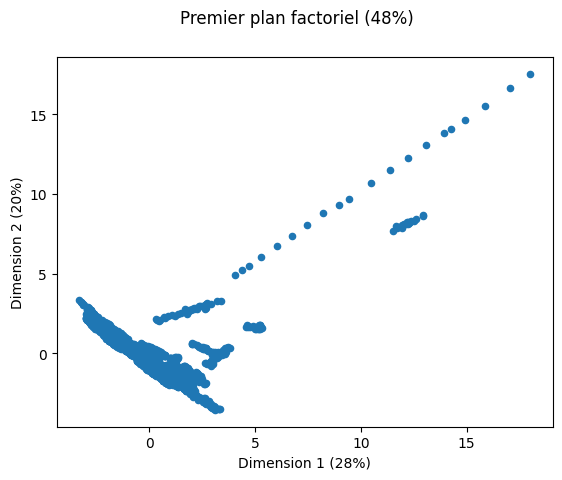

In [58]:
# Affichage de la répartition des données en fonction des 2 premières dimensions

data_pca.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1 (28%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (20%)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (48%)") # titre général
plt.show()

Interprétation : 

* Axes : L'axe horizontal (Dim 1) représente la première composante principale, et l'axe vertical (Dim 2) représente la deuxième composante principale. Ces deux axes rerésentent la plus grande partie de la variance dans nos données, avec 28% pour la Dimension 1 et 20% pour la Dimension 2, cumulant à 48% de la variance totale.

* Dispersion des Points : Chaque point représente une observation dans l'espace des composantes principales. La dispersion des points montre la distribution des observations en fonction de ces deux principales dimensions de variance.

Interprétation des Composantes :

* La dimension 1 semble capturer une variance significative, comme indiqué par le pourcentage (33%). Si cette composante est fortement corrélée avec certaines variables, cela indiquerait que ces variables sont des facteurs significatifs de variation dans nos données.

* La dimension 2 capture moins de variance (18%) mais peut représenter un autre aspect des données qui est orthogonale (donc indépendante) à la dimension 1.

Regroupements et tendances : Les groupes de points qui apparaissent sur le graphique peuvent indiquer des similitudes entre les observations. Par exemple, le grand groupe de points en bas à gauche pourrait représenter des observations avec des caractéristiques communes qui les distinguent des observations représentées par les points dispersés le long de la dimension 1.

Outliers : Des points éloignés des autres peuvent être des outliers qui ont des propriétés très différentes des observations typiques ou qui pourraient être des erreurs de mesure ou de saisie, ou encore des valeurs incohérentes avec les autres.

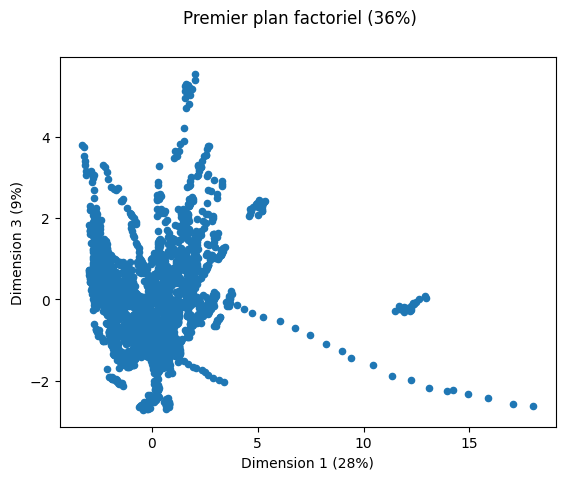

In [59]:
# Affichage de la répartition des données en fonction de Dim 1 et Dim 3

data_pca.plot.scatter("Dim1", "Dim3") # nuage de points
plt.xlabel("Dimension 1 (28%)") # modification du nom de l'axe X
plt.ylabel("Dimension 3 (9%)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (36%)") # titre général
plt.show()

Interprétation : 

Dans la continuité du raisonnement conduit sur le premier plan factoriel, nous allons analyser celui entre la première dimension et la troisème dimension de l'ACP.

* Dispersion : La dispersion des points indique la variation des observations selon ces deux dimensions de l'ACP. La plupart des observations sont concentrées vers le centre du graphique, suggérant que pour ces deux composantes, beaucoup d'observations ont des scores similaires.

* Patterns et groupes : Bien que les points soient largement dispersés, il n'y a pas de groupes distincts visibles dans cette vue. Cependant, on remarque un ensemble de points qui s'étendent le long de la dimension 1, indiquant une caractéristique qui varie de manière significative parmi ces observations.

* Outliers : Il y a quelques points qui se détachent loin du centre, en particulier le long de la dimension 1. Ces observations peuvent être très différentes du reste des données.

* Cumul de variance : Les deux dimensions affichées représentent ensemble 36% de la variance totale des données. Cela signifie que bien que ces deux composantes apportent des informations significatives sur les données, il reste encore beaucoup de variance à expliquer par d'autres composantes ou dimensions.

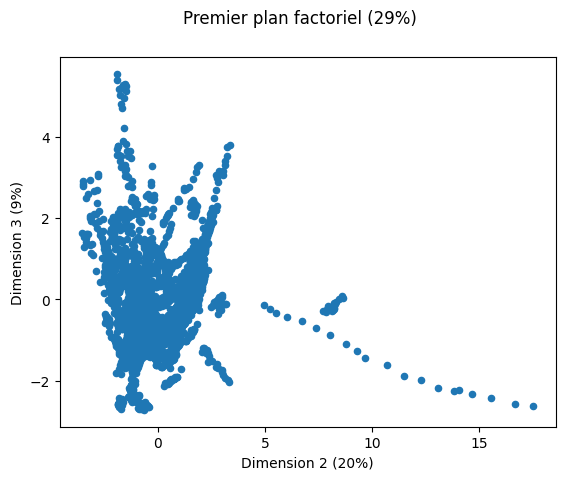

In [60]:
# Affichage de la répartition des données en fonction de Dim 2 et Dim 3

data_pca.plot.scatter("Dim2", "Dim3") # nuage de points
plt.xlabel("Dimension 2 (20%)") # modification du nom de l'axe X
plt.ylabel("Dimension 3 (9%)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (29%)") # titre général
plt.show()

Interprétation :

* Dispersion des points: La majorité des observations sont groupées autour du centre du graphique, mais il existe également un nombre significatif de points qui s'étendent loin du centre le long de la deuxième composante principale. Cela suggère qu'il y a une variable ou un ensemble de variables qui contribuent significativement à la variance dans la deuxième dimension.

* Distribution: Il y a une concentration de données autour de l'origine et une queue qui s'étend vers la droite le long de la deuxième dimension. Cela peut indiquer une distribution asymétrique des données pour les variables qui chargent fortement sur cette composante.

* Potentiels outliers: Des points éloignés des autres peuvent être identifiés comme des outliers. Ces observations pourraient représenter des cas extrêmes ou des situations particulières qui se démarquent du reste de l'ensemble des données.

### Etude des chargements 

Pour déterminer quelles variables contribuent le plus à chaque composante principale dans une Analyse en Composantes Principales (ACP), nous pouvons examiner les "chargements" des composantes. Les chargements sont des coefficients qui indiquent comment chaque variable influence une composante principale. 

In [61]:
# Les chargements sont dans pca.components_
pca = PCA(7).fit(data_quanti_scaled)
loadings = pca.components_.T  # Transposée pour aligner avec les variables originales

# Créer un DataFrame pour une meilleure lisibilité
loadings_df = pd.DataFrame(loadings, index=data_quanti_scaled.columns, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7'])

# Afficher les chargements pour les 7 premières composantes
loadings_df

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7
Elec_access,0.319780,-0.311990,-0.108765,-0.061684,0.175600,0.110740,0.043969
Clean_access,0.327868,-0.332707,0.000463,-0.081591,0.152505,0.027282,0.008050
Renewable_share,-0.304818,0.304994,0.253921,-0.153599,-0.216659,0.064227,0.067418
Fossil_elec,0.335427,0.352360,-0.107472,0.097137,-0.057673,-0.000107,-0.012391
Nuclear_elec,0.289966,0.212744,0.034098,-0.136745,-0.134455,-0.030976,0.086706
Renewable_elec,0.322843,0.336339,-0.018397,-0.040793,0.004388,0.066009,-0.018704
Low_carb_elec,-0.078855,0.134767,0.426252,-0.507680,-0.141339,0.381177,0.071886
Energy_per_capita,0.269101,-0.224340,0.410936,0.121991,-0.078365,-0.201936,0.000953
PEnergy_intensity,-0.059398,0.136066,0.471357,0.302274,0.098317,-0.585551,0.294804
CO2,0.331314,0.358508,-0.101128,0.100530,-0.034556,0.009267,-0.009048


Interprétation : 

Le tableau des chargements illustre la façon dont chaque variable contribue à chacune des sept premières dimensions de l'ACP. 

* La première dimension semble être influencée positivement par Elec_access, Clean_access, Fossil_elec, Nuclear_elec, Renewable_elec, et les émissions de CO2 (CO2), ce qui suggère que cette dimension capture un mélange de l'accès à l'électricité, la consommation d'énergie à partir de différentes sources et les émissions associées.

* La dimension 2 montre une forte contribution positive de Fossil_elec et Renewable_elec, indiquant que cette dimension peut représenter l'équilibre entre les sources d'énergie renouvelables et fossiles dans la production d'électricité des pays.

* La troisième composante principale est fortement influencée par Low_carb_elec et Energy_per_capita, ce qui pourrait indiquer que cette dimension reflète des aspects de la consommation d'énergie à faible teneur en carbone et par habitant.

* Dimension 4 : Les variables Low_carb_elec et Energy_per_capita ont des chargements relativement élevés mais de signes opposés, ce qui pourrait signifier que cette composante distingue les pays avec une consommation d'énergie par personne élevée mais ayant une faible part d'énergie à faible teneur en carbone, des pays avec une situation inverse. 

* Dimension 5 : On observe une forte charge négative pour PEnergy_intensity, indiquant que cette dimension pourrait capturer des aspects liés à l'intensité énergétique des économies. Une intensité énergétique plus faible suggère une efficacité énergétique plus élevée.

* Dimension 6 : Growth et GDP_per_capita présentent des chargements positifs significatifs, ce qui suggère que cette dimension peut refléter le niveau de développement économique et la croissance. Cela peut indiquer que les pays avec une croissance économique forte et un PIB par habitant élevé se distinguent des autres sur cette dimension.

* Dimension 7 : Longitude a un chargement négatif considérable, ce qui peut indiquer que cette composante reflète des différences géographiques ou régionales dans les données. Cela pourrait être lié à la position longitudinale des pays et à des facteurs environnementaux ou économiques qui varient d'est en ouest.

Les composantes avec des contributions élevées de Elec_access, Clean_access, et Energy_per_capita pourraient être interprétées comme des indicateurs de développement et de consommation d'énergie. Les composantes où Fossil_elec, Nuclear_elec, et Renewable_elec chargent fortement pourraient refléter la stratégie énergétique et la mixité des sources d'énergie des pays. Les dimensions où les émissions de CO2 ont des chargements élevés sont probablement liées à l'impact environnemental et pourraient être interprétées dans le contexte des objectifs de durabilité et de réduction des émissions.

## Dépendance de la variable Year et de la variable présentant les émissions de CO2

In [67]:
data_ = data.iloc[:, :-4].copy()
data_.head()

,Entity,Year,Elec_access,Clean_access,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,Low_carb_elec,Energy_per_capita,PEnergy_intensity,CO2,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
3,Afghanistan,2003,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60.0,652230.0,33.93911,67.709953


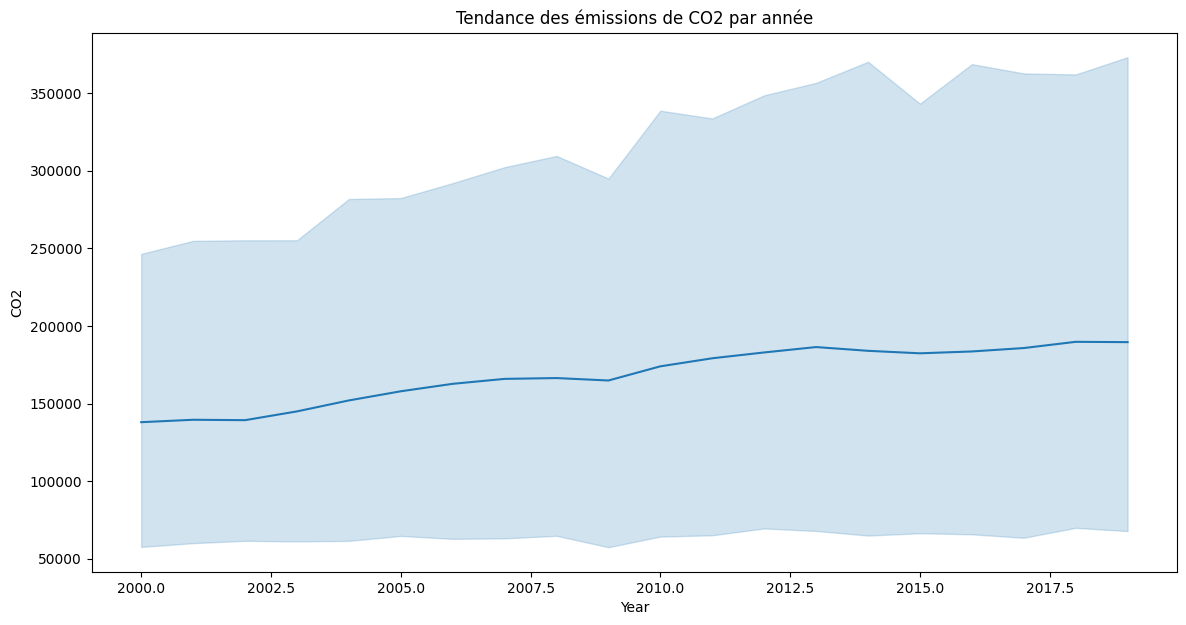

In [68]:
# Graphique de série temporelle
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_, x='Year', y='CO2')
plt.title('Tendance des émissions de CO2 par année')
plt.show()

Interprétation : 

* Tendance générale : La ligne représente la tendance moyenne des émissions de CO2 sur la période donnée. On observe que les émissions de CO2 ont globalement augmenté au fil du temps depuis l'an 2000 jusqu'à environ 2010. Après 2010, la tendance semble plus stable avec une légère augmentation ou stabilisation des émissions.

* Variation annuelle : La zone ombrée qui s'étend au-dessus et en dessous de la ligne de tendance indique la variation des émissions de CO2 au sein de chaque année. La largeur de cette zone peut signifier l'écart-type, indiquant la variabilité des émissions de CO2 d'une année à l'autre. Une zone large suggère une grande variabilité, tandis qu'une zone étroite indique une plus grande constance dans les émissions au cours de l'année. On remarque que la largeur de cette zone augmente au fur et à mesure du temps. 

* Pointes et chutes : Certaines années montrent des pointes ou des chutes dans les émissions, comme la pointe autour de 2010. Ces fluctuations pourraient être dues à des événements spécifiques ou à des changements dans les politiques environnementales, les pratiques économiques ou les technologies énergétiques.

* Analyse contextuelle : Pour comprendre pleinement ce graphique, il est important de le mettre en contexte avec d'autres données et événements. Par exemple, des augmentations dans les émissions de CO2 pourraient coïncider avec la croissance économique, tandis que des stabilisations ou des réductions pourraient refléter des améliorations dans l'efficacité énergétique ou l'adoption d'énergies renouvelables.

En résumé, ce graphique indique que, bien que les émissions de CO2 ont augmenté jusqu'à 2010, il y a eu une tendance vers la stabilisation ou une augmentation plus modérée dans les années suivantes. Cela pourrait être interprété comme un signe positif dans le contexte des efforts mondiaux de réduction des émissions.

c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


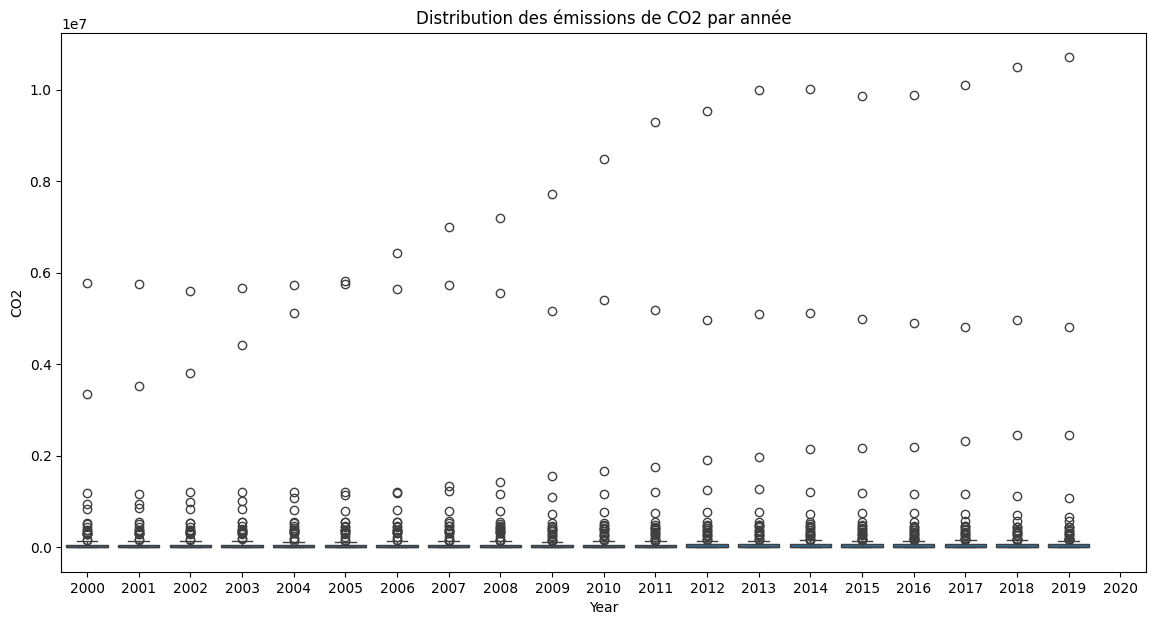

In [69]:
# Boxplot des émissions de CO2 par année
plt.figure(figsize=(14, 7))
sns.boxplot(data=data_, x='Year', y='CO2')
plt.title('Distribution des émissions de CO2 par année')
plt.show()

Interprétation

Pas la bonne échelle 
Trop d'outliers